In [3]:
import community
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import powerlaw
import random
from scipy.stats import linregress

In [4]:
df = pd.read_csv('../resources/data/random_users_data_50.csv', encoding='utf-8')

In [3]:
df.head()

,Nome de usuário,ID,AvatarURL,GravatarID,URL,HTMLURL,FollowersURL,FollowingURL,GistsURL,StarredURL,...,Hireable,Bio,PublicRepos,PublicGists,Followers,Following,CreatedAt,UpdatedAt,Following Users,Followers Users
0,cfjedimaster,393660,https://avatars.githubusercontent.com/u/393660...,NaN,https://api.github.com/users/cfjedimaster,https://github.com/cfjedimaster,https://api.github.com/users/cfjedimaster/foll...,https://api.github.com/users/cfjedimaster/foll...,https://api.github.com/users/cfjedimaster/gist...,https://api.github.com/users/cfjedimaster/star...,...,NaN,Developer evangelist focused on the web platfo...,317,1068,1069,0,2010-09-09 18:35:26+00:00,2023-08-16 13:45:27+00:00,NaN,"criscokid, stefanfrede, souzaonofre, demian031..."
1,priscillasantana,71104894,https://avatars.githubusercontent.com/u/711048...,NaN,https://api.github.com/users/priscillasantana,https://github.com/priscillasantana,https://api.github.com/users/priscillasantana/...,https://api.github.com/users/priscillasantana/...,https://api.github.com/users/priscillasantana/...,https://api.github.com/users/priscillasantana/...,...,NaN,Software Engineer - React.js | Javascript | Ty...,17,0,102,54,2020-09-10 22:43:14+00:00,2023-08-10 13:06:13+00:00,"gomex, fdaciuk, dganoff, highlabs, chasenpse, ...","gomex, chasenpse, guilouro, Epitome87, EdsonLu..."
2,TinkerChic-4,147571170,https://avatars.githubusercontent.com/u/147571...,NaN,https://api.github.com/users/TinkerChic-4,https://github.com/TinkerChic-4,https://api.github.com/users/TinkerChic-4/foll...,https://api.github.com/users/TinkerChic-4/foll...,https://api.github.com/users/TinkerChic-4/gist...,https://api.github.com/users/TinkerChic-4/star...,...,NaN,NaN,1,0,0,9,2023-10-11 01:48:59+00:00,2023-10-11 01:50:51+00:00,"xiaoyifang, randombit, liamdebeasi, igorpecovn...",NaN
3,aguai,110466,https://avatars.githubusercontent.com/u/110466...,NaN,https://api.github.com/users/aguai,https://github.com/aguai,https://api.github.com/users/aguai/followers,https://api.github.com/users/aguai/following{/...,https://api.github.com/users/aguai/gists{/gist...,https://api.github.com/users/aguai/starred{/ow...,...,True,Not a coder,70,6,239,1257,2009-07-30 23:26:19+00:00,2020-02-25 18:01:40+00:00,"stevedekorte, spicycode, robbyrussell, notefla...","mattn, fourdollars, kommit, fanweixiao, esin, ..."
4,ErisvaldoCarvalho,13559517,https://avatars.githubusercontent.com/u/135595...,NaN,https://api.github.com/users/ErisvaldoCarvalho,https://github.com/ErisvaldoCarvalho,https://api.github.com/users/ErisvaldoCarvalho...,https://api.github.com/users/ErisvaldoCarvalho...,https://api.github.com/users/ErisvaldoCarvalho...,https://api.github.com/users/ErisvaldoCarvalho...,...,NaN,"Gosto de artes marciais, andar de patins, forr...",37,0,5,11,2015-07-29 17:46:12+00:00,2023-08-03 00:45:31+00:00,"leandrocgsi, ErikEJ, polianadias, EduardoPires...","andrejr105, victorsouza19, WSilvaM, evanderson..."


----------------------------------------------------------------------------------

## Criando o Grafo

In [5]:
# Crie um grafo direcionado no NetworkX
G = nx.DiGraph()

# Adicione nós para os usuários
for _, row in df.iterrows():
    G.add_node(row["Nome de usuário"])
    
    # Adicione as relações de seguindo (following)
    following_users = str(row["Following Users"]).split(", ")
    for following_user in following_users:
        if following_user.strip():  # Verifique se a string não está vazia
            G.add_edge(row["Nome de usuário"], following_user)
        
    # Adicione as relações de seguidores (followers)
    followers_users = str(row["Followers Users"]).split(", ")
    for follower_user in followers_users:
        if follower_user.strip():  # Verifique se a string não está vazia
            G.add_edge(follower_user, row["Nome de usuário"])

# Análise da Estrutura da rede

A rede analisada refere-se à rede de usuários do GitHub, uma plataforma de desenvolvimento colaborativo de software. Nesta rede, os "nós" representam os usuários individuais do GitHub, cada um com um perfil que inclui informações pessoais, repositórios de código-fonte, atividades, seguidores e usuários que estão seguindo. Os "arestas" na rede representam as conexões entre os usuários, que podem ser de dois tipos:

Seguindo (`Following`): Uma aresta entre o usuário A e o usuário B indica que o usuário A está seguindo o usuário B.

Seguidores (`Followers`): Uma aresta entre o usuário B e o usuário A indica que o usuário B está seguindo o usuário A.

Em resumo, os "nós" são os perfis de usuários individuais no GitHub, e as "arestas" representam as conexões de "seguindo" e "seguidores" entre esses usuários. A rede é usada para rastrear o relacionamento de seguidores e seguindo de usuários, bem como para facilitar a colaboração e a descoberta de projetos de código aberto e repositórios interessantes. A análise dessa rede pode fornecer insights sobre a interação e a influência dos usuários na plataforma do GitHub.

Abaixo Temos o números de nós e arestas do grafo

In [6]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f'numero de nós {num_nodes}')
print(f'numero de arestas {num_edges}')


numero de nós 35057
numero de arestas 38254


## Distribuição de nós

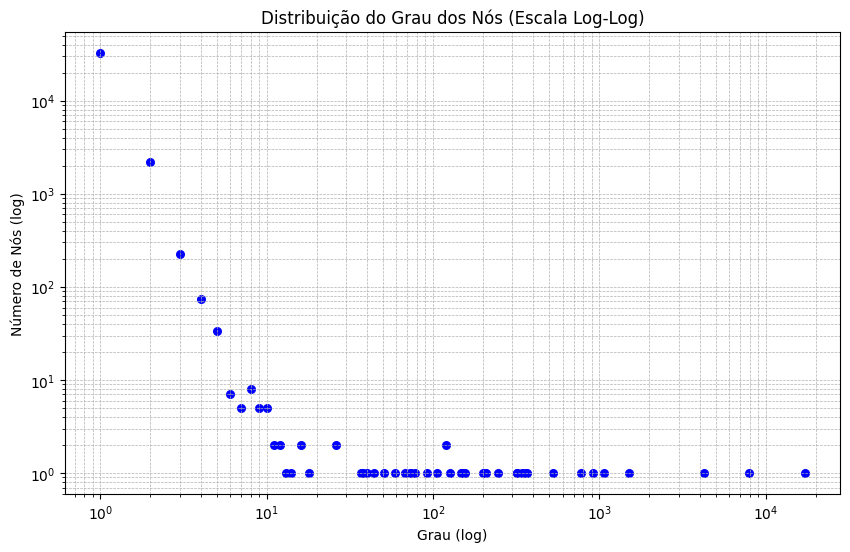

In [7]:
# Calcule os graus dos nós
degree_sequence = [d for n, d in G.degree()]

# Calcule a distribuição do grau
degree_counts = dict(zip(*np.unique(degree_sequence, return_counts=True)))

# Prepare os dados para o gráfico
degrees, counts = zip(*degree_counts.items())

# Plote a distribuição do grau dos nós em escala log-log
plt.figure(figsize=(10, 6))
plt.scatter(degrees, counts, color='b', marker='o', s=30)
plt.xscale('log')
plt.yscale('log')
plt.title("Distribuição do Grau dos Nós (Escala Log-Log)")
plt.xlabel("Grau (log)")
plt.ylabel("Número de Nós (log)")
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

Calculating best minimal value for power law fit


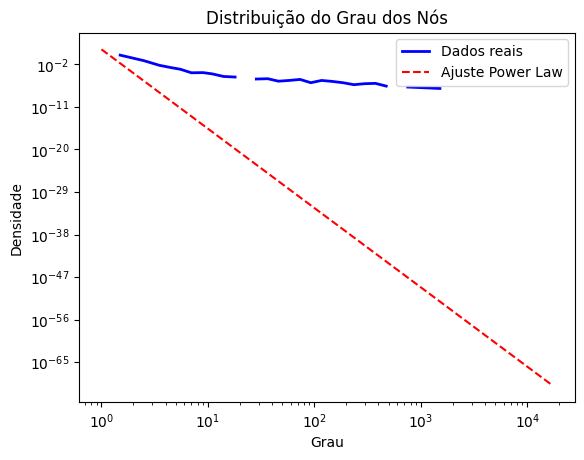

Alpha (exponente da Power Law): 16.791225561734656
Xmin (valor mínimo): 1.0


In [8]:
# Calcule os graus dos nós
degree_sequence = [d for n, d in G.degree()]

# Crie um objeto PowerLaw a partir dos dados
fit = powerlaw.Fit(degree_sequence)

# Plote a distribuição do grau
fit.plot_pdf(color='b', linewidth=2)
plt.title("Distribuição do Grau dos Nós")
plt.xlabel("Grau")
plt.ylabel("Densidade")

# Plote o ajuste da Power Law
fit.power_law.plot_pdf(color='r', linestyle='--', ax=plt.gca())
plt.legend(['Dados reais', 'Ajuste Power Law'])
plt.show()

# Exiba os parâmetros estimados da Power Law
print("Alpha (exponente da Power Law):", fit.power_law.alpha)
print("Xmin (valor mínimo):", fit.power_law.xmin)

A análise indica uma distribuição do grau dos nós que difere significativamente de uma típica distribuição de Power Law encontrada em muitas redes do mundo real. O alto valor de alpha sugere uma cauda mais pesada na distribuição, indicando a presença de alguns nós altamente conectados que exercem uma influência desproporcional na rede. Além disso, o valor baixo de Xmin sugere que a distribuição segue uma Power Law desde o início, indicando a presença de nós com graus muito baixos, mas também alguns nós excepcionalmente conectados.

Essa distribuição desigual é comum em redes complexas, onde alguns nós, conhecidos como "hubs", têm uma quantidade significativamente maior de conexões em comparação com a maioria dos nós na rede. Esses hubs desempenham um papel crucial na conectividade da rede, influenciando fortemente a dinâmica e a estrutura geral.

É importante ressaltar que a interpretação desses parâmetros depende do contexto específico da sua rede e do fenômeno que ela representa. Neste caso, o padrão observado sugere uma rede com hubs proeminentes, onde alguns nós têm uma quantidade excepcionalmente alta de conexões.

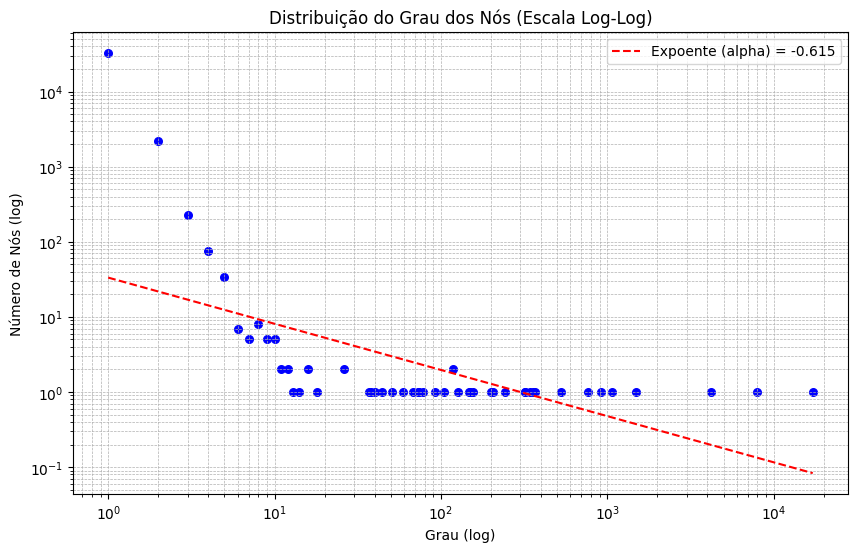

Coeficiente Angular (alpha): -0.615


In [9]:
# Calcule os graus dos nós
degree_sequence = [d for n, d in G.degree()]

# Calcule a distribuição do grau
degree_counts = dict(zip(*np.unique(degree_sequence, return_counts=True)))

# Prepare os dados para o gráfico
degrees, counts = zip(*degree_counts.items())

# Realize uma regressão linear no espaço log-log
log_degrees = np.log(degrees)
log_counts = np.log(counts)
slope, intercept, r_value, p_value, std_err = linregress(log_degrees, log_counts)

# Plote a distribuição do grau dos nós em escala log-log
plt.figure(figsize=(10, 6))
plt.scatter(degrees, counts, color='b', marker='o', s=30)
plt.xscale('log')
plt.yscale('log')
plt.title("Distribuição do Grau dos Nós (Escala Log-Log)")
plt.xlabel("Grau (log)")
plt.ylabel("Número de Nós (log)")
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Plote a reta da regressão linear
plt.plot(degrees, np.exp(intercept) * degrees**slope, 'r--', label=f'Expoente (alpha) = {slope:.3f}')
plt.legend()

plt.show()

# Exiba o coeficiente angular da reta (estimativa de alpha)
print(f"Coeficiente Angular (alpha): {slope:.3f}")

No seu caso, o valor obtido para o coeficiente angular (alpha) é -0.615. Uma análise desse resultado pode ser feita da seguinte forma:

Valor de Alpha: Um valor negativo de alpha indica que a distribuição é "cortada" ou "truncada". Isso significa que a probabilidade de encontrar nós com graus mais altos diminui mais rapidamente do que seria esperado em uma distribuição de Power Law pura.

Sinal Negativo: O sinal negativo de alpha sugere que a cauda da distribuição está decrescendo. Em muitas redes do mundo real, um sinal negativo de alpha pode indicar que a probabilidade de encontrar nós altamente conectados diminui mais rapidamente do que em uma Power Law pura.

In [10]:
# Calcule os graus dos nós
degree_sequence = [d for n, d in G.degree()]

# Calcule o grau médio
grau_medio = sum(degree_sequence) / len(degree_sequence)

print("Grau Médio do Grafo:", grau_medio)

Grau Médio do Grafo: 2.18238868129047


O grau médio do grafo é uma medida importante que representa a média dos graus dos nós na rede. No seu caso, o grau médio do grafo é aproximadamente 2.1824.

Isso indica que, em média, cada nó na sua rede está conectado a aproximadamente 2.18 outros nós. O grau médio é uma métrica fundamental que fornece insights sobre a conectividade geral da rede. No contexto da distribuição de graus, o grau médio ajuda a caracterizar a densidade média de conexões na rede.

------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Componentes do grafo

In [25]:
# Calcule o número de componentes do grafo
num_componentes = nx.number_weakly_connected_components(G)

print("Número de Componentes do Grafo:", num_componentes)

Número de Componentes do Grafo: 1


In [28]:
if num_componentes > 1:
  
   # Calcule os tamanhos dos componentes
    tamanhos_componentes = [len(componente) for componente in nx.weakly_connected_components(G)]

    # Plote a distribuição dos tamanhos dos componentes
    plt.figure(figsize=(10, 6))
    plt.hist(tamanhos_componentes, bins=20, color='b', alpha=0.7)
    plt.title("Distribuição do Tamanho dos Componentes")
    plt.xlabel("Tamanho dos Componentes")
    plt.ylabel("Número de Componentes")
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.show()
else:
    print("O grafo possui apenas um componente.")

O grafo possui apenas um componente.


-------------------------------------------------------------------------------------------------------------------

## Coeficiente de clusterização

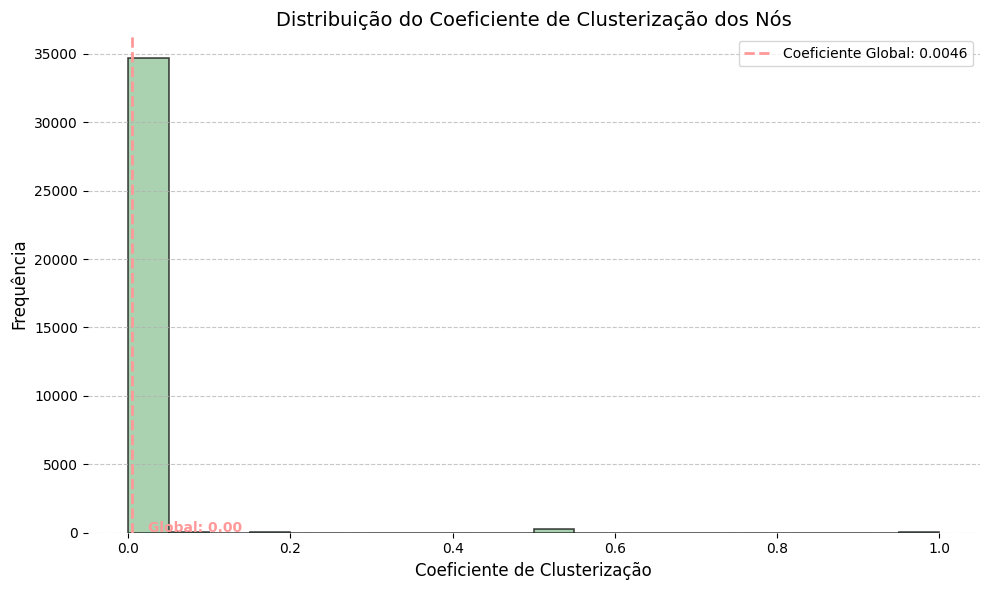

In [31]:

# Calcular o coeficiente de clusterização para cada nó
coeficientes_nodos = nx.clustering(G)

# Calcular o coeficiente de clusterização global
coeficiente_global = nx.average_clustering(G)

# Configurações estilísticas
plt.figure(figsize=(10, 6))
plt.hist(list(coeficientes_nodos.values()), bins=np.linspace(0, 1, 21), color='#86bf91', alpha=0.7, edgecolor='black', linewidth=1.2)
plt.axvline(x=coeficiente_global, color='#ff9999', linestyle='--', linewidth=2, label=f'Coeficiente Global: {coeficiente_global:.4f}')
plt.text(coeficiente_global + 0.02, 60, f'Global: {coeficiente_global:.2f}', rotation=0, color='#ff9999', weight='bold')
plt.xlabel('Coeficiente de Clusterização', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Distribuição do Coeficiente de Clusterização dos Nós', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Remover os spines (linhas de contorno)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

In [32]:

# Exibir o coeficiente de clusterização global
print(f'Coeficiente de Clusterização Global: {coeficiente_global}')

Coeficiente de Clusterização Global: 0.00461687744210568


-------------------------------------------------------------------------------------------------------

## distância entre nós do grafo

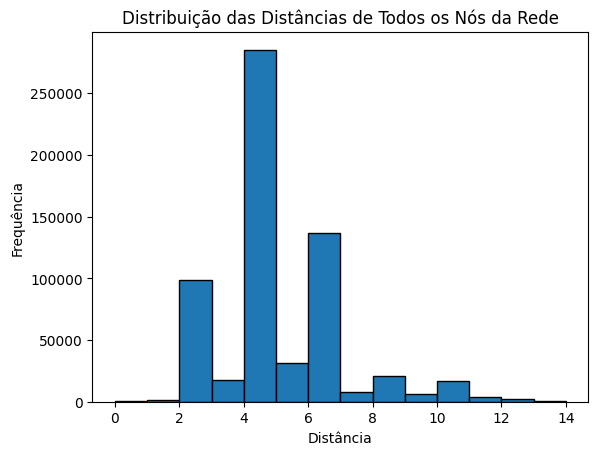

Distância Média: 4.588590024172467
Diâmetro da Rede: 14


In [33]:

# a. Calcular a distância média para a maior componente fortemente conectada
largest_scc = max(nx.strongly_connected_components(G), key=len)
G_largest_scc = G.subgraph(largest_scc)
distancia_media = nx.average_shortest_path_length(G_largest_scc)

# b. Calcular a distribuição das distâncias de todos os nodos da rede
distancias_nodos = []
for node in G_largest_scc.nodes:
    distancias_nodos.extend(list(nx.shortest_path_length(G_largest_scc, source=node).values()))

# Plotar a distribuição das distâncias
plt.hist(distancias_nodos, bins=max(distancias_nodos), edgecolor='black')
plt.xlabel('Distância')
plt.ylabel('Frequência')
plt.title('Distribuição das Distâncias de Todos os Nós da Rede')
plt.show()

# c. Calcular o diâmetro da maior componente fortemente conectada
diametro_rede = nx.diameter(G_largest_scc)

# Exibir os resultados
print(f'Distância Média: {distancia_media}')
print(f'Diâmetro da Rede: {diametro_rede}')

Distância Média:

A distância média (ou caminho médio) é a média das distâncias mais curtas entre todos os pares de nós no grafo. Em termos simples, representa a "distância média" esperada entre dois usuários escolhidos aleatoriamente na rede.
No seu caso, a distância média é de aproximadamente 4.59 unidades. Quanto menor a distância média, mais "próximos" os nós estão em termos de conexões, o que sugere uma rede relativamente densa ou interconectada.
Diâmetro da Rede:

O diâmetro da rede é a distância mais longa entre quaisquer dois nós na rede. Representa a "largura máxima" da rede, indicando o máximo de passos necessários para alcançar o par mais distante de nós.
No seu caso, o diâmetro da rede é 14 unidades. Isso significa que há pelo menos um caminho na rede que requer 14 passos para ser percorrido. O diâmetro é uma medida de quanto a rede é esparsa ou fragmentada.
Em resumo:

Uma distância média relativamente baixa sugere uma rede densa, onde os usuários estão geralmente bem conectados.
Um diâmetro maior indica que há pelo menos alguns pares de usuários que estão mais distantes em termos de conexões.
Essas métricas são úteis para entender a eficiência geral da rede em termos de comunicação e para avaliar a escala das distâncias na rede. Interpretar esses valores depende do contexto específico da sua aplicação e dos objetivos da análise.

In [34]:
# Encontre o maior componente fortemente conectado
largest_strongly_connected_component = max(nx.strongly_connected_components(G), key=len)

# Crie um subgrafo com apenas o maior componente fortemente conectado
subgraph_strongly_connected = G.subgraph(largest_strongly_connected_component)

# Calcule o diâmetro do subgrafo fortemente conectado
diameter_strongly_connected = nx.diameter(subgraph_strongly_connected)

print(f'Diâmetro do Maior Componente Fortemente Conectado: {diameter_strongly_connected}')



Diâmetro do Maior Componente Fortemente Conectado: 14


In [35]:
# Calcular os comprimentos dos caminhos mais curtos para todos os pares de nós
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

# Calcular o comprimento médio do caminho mais curto para cada nó
average_path_lengths = [
    np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
]

# Calcular a média sobre todos os nós
average_path_length_overall = np.mean(average_path_lengths)

print(f'Média do comprimento do caminho mais curto para todos os nós: {average_path_length_overall}')

Média do comprimento do caminho mais curto para todos os nós: 2.2876704425431913


A média do comprimento do caminho mais curto para todos os nós é uma métrica que fornece uma visão adicional sobre a conectividade do grafo. Vamos entender o significado dessa métrica:

- **Média do Comprimento do Caminho Mais Curto:**
  - Nesse contexto, "comprimento do caminho" refere-se ao número de arestas (ou passos) entre dois nós no grafo. O "caminho mais curto" entre dois nós é o caminho com o menor número de arestas.
  - A média do comprimento do caminho mais curto para todos os nós é a média dos comprimentos dos caminhos mais curtos entre cada par possível de nós no grafo.

No seu caso, a média do comprimento do caminho mais curto é de aproximadamente 2.29 unidades. Isso sugere que, em média, é necessário percorrer cerca de 2.29 passos para ir de um nó para outro na rede.

Interpretação:
- Uma média relativamente baixa indica que, em geral, os nós estão razoavelmente próximos uns dos outros em termos de conexões.
- Uma média mais alta poderia indicar uma rede mais esparsa, onde os nós estão mais distantes uns dos outros em termos de conexões.

Essa métrica complementa a distância média e o diâmetro da rede ao fornecer uma média global do comprimento do caminho mais curto entre todos os pares de nós. Novamente, a interpretação específica depende do contexto e dos objetivos da sua análise.

----------------------------------------------------------------------------------------------------

## Outros Insights

In [36]:
nx.density(G)

3.112717767700921e-05

 grafo é bastante esparsamente conectado.

In [40]:
G_undirected = G.to_undirected()


# Criando um mapeamento entre rótulos de nó e índices inteiros
node_to_index = {node: i for i, node in enumerate(G_undirected.nodes)}

colors = ["" for x in range(G_undirected.number_of_nodes())]  # inicializa a lista de cores
counter = 0
for com in nx.community.label_propagation_communities(G_undirected):
    color = "#%06X" % random.randint(0, 0xFFFFFF)  # cria uma cor RGB aleatória
    counter += 1
    for node in list(com):
        index = node_to_index[node]  # obtém o índice associado ao nó
        colors[index] = color

print(f'Número de comunidades detectadas: {counter}')

Número de comunidades detectadas: 47


------------------------------------------------------------------------------------------------------------------

## Calcule uma medida de importância/centralidade dos nodos nessa rede

In [43]:

# a. Calcular a centralidade de betweenness
betweenness_centrality = nx.betweenness_centrality(G)

# b. Calcular a centralidade de PageRank
pagerank_centrality = nx.pagerank(G)

# Exibir os resultados
print("Betweenness Centrality:")
for node, centrality in sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{node}: {centrality}")

print("\nPageRank Centrality:")
for node, centrality in sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{node}: {centrality}")

Betweenness Centrality:
kazupon: 0.028373228474312912
aguai: 0.02199000864685665
mattn: 0.020551430197106237
justStarNew: 0.019769624503739248
bchiang7: 0.017892914301894224

PageRank Centrality:
bchiang7: 0.12485867233498371
kazupon: 0.08244933643203729
cfjedimaster: 0.01273208584337914
nan: 0.010472558976403978
sdras: 0.008221180585612725


----------------------------------------------------------------------------------------------------------------------------------------------

A interpretação do papel dos nós mais importantes dependerá do contexto do seu grafo. Nós com alta centralidade de betweenness são frequentemente intérpretes de papéis de "ponte" entre diferentes partes da rede, enquanto nós com alto PageRank são considerados mais "importantes" de acordo com o algoritmo de classificação do PageRank. Essas interpretações podem variar dependendo do domínio específico da sua rede.

------------------------------------------------------------------------------------------------------------------------------------

## Analise a resiliência do grafo à medida que você retira nodos e arestas importantes

In [44]:
# Escolher os nós mais importantes para cada métrica
important_nodes_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
important_nodes_pagerank = sorted(pagerank_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

# Remover os nós importantes e observar o efeito na conectividade
def avaliar_resiliencia(grafo, remocoes, nome_metrica):
    print(f"Removendo nós importantes por {nome_metrica}:\n")
    for node, _ in remocoes:
        grafo_temp = grafo.copy()
        grafo_temp.remove_node(node)
        componente_conectada = max(nx.weakly_connected_components(grafo_temp), key=len)
        tamanho_componente = len(componente_conectada)
        print(f"Node {node} removido. Tamanho da maior componente conectada: {tamanho_componente}")

# Avaliar resiliência à remoção de nós importantes
avaliar_resiliencia(G, important_nodes_betweenness, "Betweenness Centrality")

print("\n")

avaliar_resiliencia(G, important_nodes_pagerank, "PageRank Centrality")

Removendo nós importantes por Betweenness Centrality:

Node kazupon removido. Tamanho da maior componente conectada: 31457
Node aguai removido. Tamanho da maior componente conectada: 33938
Node mattn removido. Tamanho da maior componente conectada: 35056
Node justStarNew removido. Tamanho da maior componente conectada: 19094
Node bchiang7 removido. Tamanho da maior componente conectada: 27250


Removendo nós importantes por PageRank Centrality:

Node bchiang7 removido. Tamanho da maior componente conectada: 27250
Node kazupon removido. Tamanho da maior componente conectada: 31457
Node cfjedimaster removido. Tamanho da maior componente conectada: 34065
Node nan removido. Tamanho da maior componente conectada: 35054
Node sdras removido. Tamanho da maior componente conectada: 35056


--------------------------------------------------------------------------------------------------------------

## Assortividade do grafo

In [46]:

# Calcular assortatividade
assortatividade = nx.degree_assortativity_coefficient(G)


# Exibir o coeficiente de Pearson para a assortatividade
print(f'Coeficiente de Assortatividade de Pearson: {assortatividade}')

Coeficiente de Assortatividade de Pearson: -0.584952768559921


-------------------------------------------------------------------------------------------------------------

## Caso seja possível montar um grafo que identifique uma relação positiva e negativa (ex. amizade e inimizade) realize uma análise dos triângulos formados nesse grafo e verifique se a maior parte encontrada são triângulos balanceados ou desbalanceados.

In [6]:
# Contar triângulos balanceados e desbalanceados
triangulos_balanceados = 0
triangulos_desbalanceados = 0

for node in G.nodes:
    neighbors = set(G.neighbors(node))
    for neighbor1 in neighbors:
        for neighbor2 in neighbors:
            if neighbor1 < neighbor2:
                if G.has_edge(neighbor1, neighbor2) and G.has_edge(neighbor1, node) and G.has_edge(neighbor2, node):
                    # Triângulo encontrado
                    arestas_negativas = sum([1 for u, v, attrs in [(neighbor1, neighbor2, G[neighbor1][neighbor2]), (neighbor1, node, G[neighbor1][node]), (neighbor2, node, G[neighbor2][node])] if "atributo_negativo" in attrs and attrs["atributo_negativo"] == "inimizade"])
                    if arestas_negativas % 2 == 0:
                        triangulos_balanceados += 1
                    else:
                        triangulos_desbalanceados += 1

# Exibir resultados
print(f'Triângulos Balanceados: {triangulos_balanceados}')
print(f'Triângulos Desbalanceados: {triangulos_desbalanceados}')

Triângulos Balanceados: 10
Triângulos Desbalanceados: 0


---------------------------------------------------------------------------------

## Caso o grafo montado na questão anterior permita, seu projeto pode consistir em implementar simulações para responder questões do tipo “e se?” utilizando modelos epidemiológicos.

Day 0: Susceptible=35052, Infected=5, Recovered=0
Day 1: Susceptible=35050, Infected=5, Recovered=2
Day 2: Susceptible=34927, Infected=113, Recovered=17
Day 3: Susceptible=34841, Infected=190, Recovered=26
Day 4: Susceptible=34783, Infected=234, Recovered=40
Day 5: Susceptible=34732, Infected=271, Recovered=54
Day 6: Susceptible=34591, Infected=390, Recovered=76
Day 7: Susceptible=34497, Infected=451, Recovered=109
Day 8: Susceptible=34041, Infected=841, Recovered=175
Day 9: Susceptible=33720, Infected=1094, Recovered=243
Day 10: Susceptible=33529, Infected=1217, Recovered=311
Day 11: Susceptible=33327, Infected=1381, Recovered=349
Day 12: Susceptible=33058, Infected=1586, Recovered=413
Day 13: Susceptible=32880, Infected=1718, Recovered=459
Day 14: Susceptible=32741, Infected=1796, Recovered=520
Day 15: Susceptible=32645, Infected=1861, Recovered=551
Day 16: Susceptible=32523, Infected=1941, Recovered=593
Day 17: Susceptible=32454, Infected=1959, Recovered=644
Day 18: Susceptible=3240

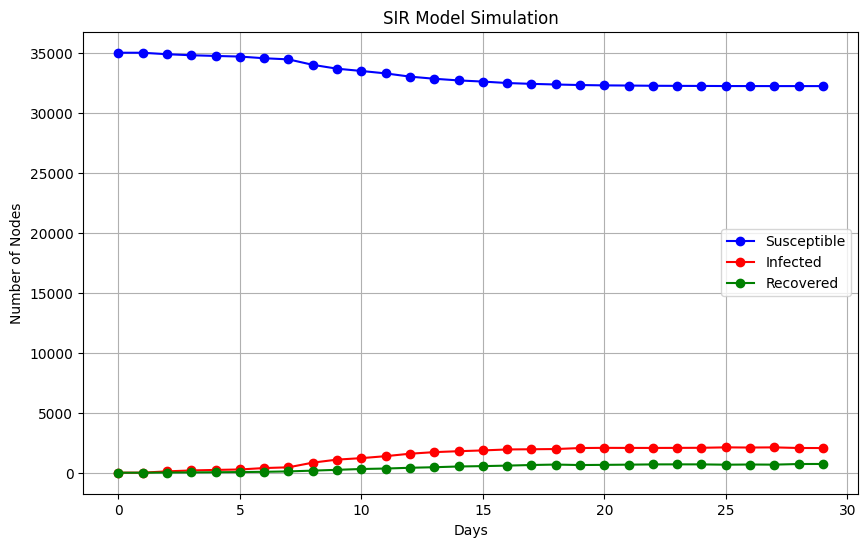

In [10]:

def initialize_graph_states(graph, initial_infected_nodes):
    # Adiciona um atributo 'estado' para representar o estado de cada nó
    node_states = {node: 'susceptible' for node in graph.nodes}
    
    # Escolhe alguns nós como infectados iniciais
    for node in initial_infected_nodes:
        node_states[node] = 'infected'
    
    nx.set_node_attributes(graph, values=node_states, name='estado')

def sir_model(graph, beta, gamma, days=10):
    susceptible, infected, recovered = [], [], []

    for day in range(days):
        # Contagem de estados usando numpy
        state_counts = np.array([len([node for node in graph.nodes if graph.nodes[node]['estado'] == state]) for state in ['susceptible', 'infected', 'recovered']])
        
        susceptible.append(state_counts[0])
        infected.append(state_counts[1])
        recovered.append(state_counts[2])

        # Impressão do estado dos nós no início de cada dia
        print(f'Day {day}: Susceptible={state_counts[0]}, Infected={state_counts[1]}, Recovered={state_counts[2]}')

        for node in graph.nodes:
            if graph.nodes[node]['estado'] == 'infected':
                neighbors = list(graph.neighbors(node))
                for neighbor in neighbors:
                    if np.random.rand() < beta:
                        graph.nodes[neighbor]['estado'] = 'infected'
                if np.random.rand() < gamma:
                    graph.nodes[node]['estado'] = 'recovered'

    return susceptible, infected, recovered

# Criando uma cópia do grafo
G_copy = G.copy()

# Escolhendo alguns nós como infectados iniciais
initial_infected_nodes = np.random.choice(list(G_copy.nodes), size=5, replace=False)

# Inicializando os estados dos nós
initialize_graph_states(G_copy, initial_infected_nodes)

# Parâmetros do modelo SIR
beta = 0.3  # Taxa de transmissão
gamma = 0.1  # Taxa de recuperação

# Rodando a simulação
days = 30
susceptible, infected, recovered = sir_model(G_copy, beta, gamma, days)


# Plotando os resultados
plt.figure(figsize=(10, 6))

plt.plot(range(days), susceptible, label='Susceptible', linestyle='-', marker='o', color='blue')
plt.plot(range(days), infected, label='Infected', linestyle='-', marker='o', color='red')
plt.plot(range(days), recovered, label='Recovered', linestyle='-', marker='o', color='green')

plt.xlabel('Days')
plt.ylabel('Number of Nodes')
plt.legend()
plt.title('SIR Model Simulation')

# Adicionando uma grade para melhorar a visualização
plt.grid(True)

plt.show()

Day 0: Susceptible=10512, Infected=5, Recovered=0
Day 1: Susceptible=10507, Infected=9, Recovered=1
Day 2: Susceptible=10477, Infected=36, Recovered=4
Day 3: Susceptible=10432, Infected=83, Recovered=2
Day 4: Susceptible=10367, Infected=141, Recovered=9
Day 5: Susceptible=10255, Infected=249, Recovered=13
Day 6: Susceptible=10064, Infected=428, Recovered=25
Day 7: Susceptible=9818, Infected=649, Recovered=50
Day 8: Susceptible=9349, Infected=1104, Recovered=64
Day 9: Susceptible=8706, Infected=1690, Recovered=121
Day 10: Susceptible=7728, Infected=2637, Recovered=152
Day 11: Susceptible=6489, Infected=3799, Recovered=229
Day 12: Susceptible=5064, Infected=5113, Recovered=340
Day 13: Susceptible=3778, Infected=6310, Recovered=429
Day 14: Susceptible=2579, Infected=7422, Recovered=516
Day 15: Susceptible=1607, Infected=8394, Recovered=516
Day 16: Susceptible=937, Infected=9000, Recovered=580
Day 17: Susceptible=520, Infected=9397, Recovered=600
Day 18: Susceptible=277, Infected=9626, Rec

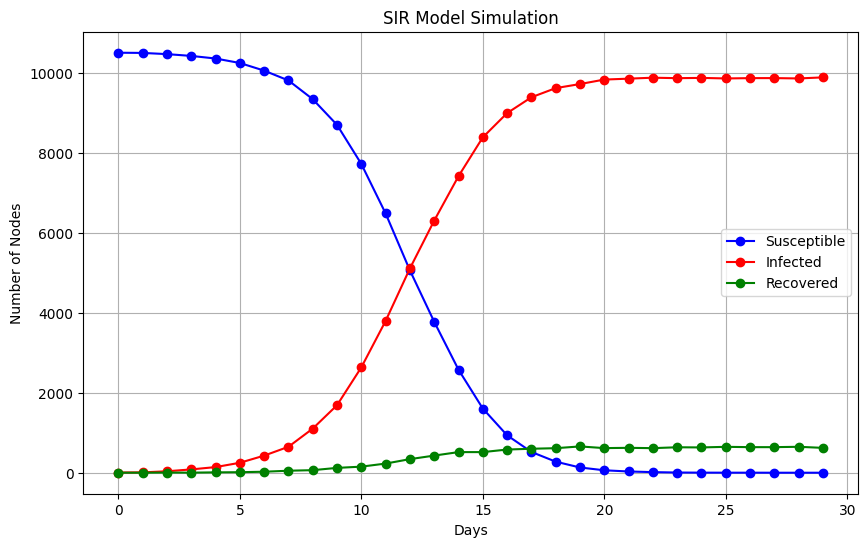

In [26]:
grafo_small_world_nao_direcionado = nx.newman_watts_strogatz_graph(10517, 4, 0.1, seed=42)

# Direcionar as arestas conforme necessário
grafo_small_world = grafo_small_world_nao_direcionado.to_directed()

grafo_small_world_copy = grafo_small_world.copy()

# Escolhendo alguns nós como infectados iniciais
initial_infected_nodes = np.random.choice(list(grafo_small_world_copy.nodes), size=5, replace=False)

# Inicializando os estados dos nós
initialize_graph_states(grafo_small_world_copy, initial_infected_nodes)


# Rodando a simulação
days = 30
susceptible, infected, recovered = sir_model(grafo_small_world_copy, beta, gamma, days)


# Plotando os resultados
plt.figure(figsize=(10, 6))

plt.plot(range(days), susceptible, label='Susceptible', linestyle='-', marker='o', color='blue')
plt.plot(range(days), infected, label='Infected', linestyle='-', marker='o', color='red')
plt.plot(range(days), recovered, label='Recovered', linestyle='-', marker='o', color='green')

plt.xlabel('Days')
plt.ylabel('Number of Nodes')
plt.legend()
plt.title('SIR Model Simulation')

# Adicionando uma grade para melhorar a visualização
plt.grid(True)

plt.show()

---------------------------------------------------------------------------------

## Comparando com outros grafos

In [27]:
grafo_small_world_nao_direcionado = nx.newman_watts_strogatz_graph(10517, 4, 0.1, seed=42)

# Direcionar as arestas conforme necessário
grafo_small_world = grafo_small_world_nao_direcionado.to_directed()

In [28]:
# Calcular métricas para o grafo direcionado
if nx.is_strongly_connected(G):
    coeficiente_agrupamento_direcionado = nx.average_clustering(G)
    distancia_media_direcionado = nx.average_shortest_path_length(G)
else:
    largest_scc = max(nx.strongly_connected_components(G), key=len)
    G_largest_scc = G.subgraph(largest_scc)
    coeficiente_agrupamento_direcionado = nx.average_clustering(G_largest_scc)
    distancia_media_direcionado = nx.average_shortest_path_length(G_largest_scc)

# Calcular métricas para o grafo small-world
coeficiente_agrupamento_small_world = nx.average_clustering(grafo_small_world)
distancia_media_small_world = nx.average_shortest_path_length(grafo_small_world)

# Exibir métricas
print(f'Coeficiente de Agrupamento (Direcionado): {coeficiente_agrupamento_direcionado}')
print(f'Distância Média (Direcionado): {distancia_media_direcionado}')

print(f'Coeficiente de Agrupamento (Small-World): {coeficiente_agrupamento_small_world}')
print(f'Distância Média (Small-World): {distancia_media_small_world}')

Coeficiente de Agrupamento (Direcionado): 0.013020531971773013
Distância Média (Direcionado): 4.588590024172467
Coeficiente de Agrupamento (Small-World): 0.42547236447114756
Distância Média (Small-World): 11.483414271801712


In [29]:

# Gerar um grafo de Barabási-Albert
n_nodes = 10517
m = 3  # Número de arestas a serem adicionadas a cada novo nó
grafo_barabasi_albert = nx.barabasi_albert_graph(n_nodes, m)

In [30]:
# Calcular métricas para o grafo direcionado
if nx.is_strongly_connected(G):
    coeficiente_agrupamento_direcionado = nx.average_clustering(G)
    distancia_media_direcionado = nx.average_shortest_path_length(G)
else:
    largest_scc = max(nx.strongly_connected_components(G), key=len)
    G_largest_scc = G.subgraph(largest_scc)
    coeficiente_agrupamento_direcionado = nx.average_clustering(G_largest_scc)
    distancia_media_direcionado = nx.average_shortest_path_length(G_largest_scc)

# Calcular métricas para o grafo de Barabási-Albert
coeficiente_agrupamento_barabasi_albert = nx.average_clustering(grafo_barabasi_albert)
distancia_media_barabasi_albert = nx.average_shortest_path_length(grafo_barabasi_albert)

# Exibir métricas
print(f'Coeficiente de Agrupamento (Direcionado): {coeficiente_agrupamento_direcionado}')
print(f'Distância Média (Direcionado): {distancia_media_direcionado}')

print(f'Coeficiente de Agrupamento (Barabási-Albert): {coeficiente_agrupamento_barabasi_albert}')
print(f'Distância Média (Barabási-Albert): {distancia_media_barabasi_albert}')

Coeficiente de Agrupamento (Direcionado): 0.013020531971773013
Distância Média (Direcionado): 4.588590024172467
Coeficiente de Agrupamento (Barabási-Albert): 0.004751309829213006
Distância Média (Barabási-Albert): 4.317932371480064


----------------------------------------------------------------------

## Louvain

In [33]:
G_undirected = G.to_undirected()

Número de Comunidades: 15


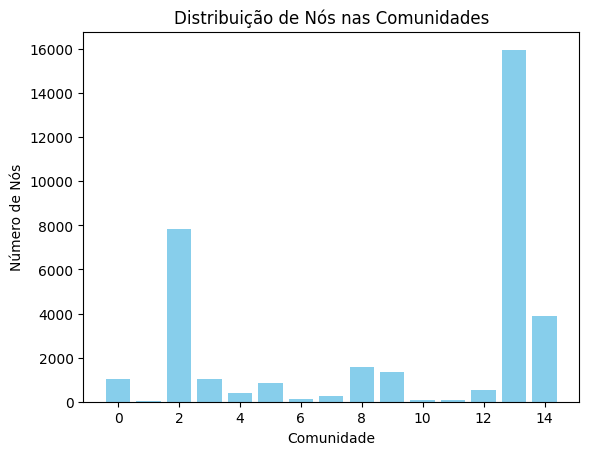

In [34]:
# G é o seu grafo
partition = community.best_partition(G_undirected)

# Adiciona a partição como um atributo dos nós no grafo
nx.set_node_attributes(G, partition, 'community')

# Exibe o número de comunidades detectadas
num_communities = max(partition.values()) + 1
print(f'Número de Comunidades: {num_communities}')

# Visualiza a distribuição dos nós nas comunidades
community_sizes = [list(partition.values()).count(c) for c in set(partition.values())]
plt.bar(range(num_communities), community_sizes, color='skyblue')
plt.xlabel('Comunidade')
plt.ylabel('Número de Nós')
plt.title('Distribuição de Nós nas Comunidades')
plt.show()


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Análise da perguntas principais

In [24]:
dataset_graph_stats = pd.read_csv('../resources/data/graph_users_with_stats.csv')
dataset_graph_stats

,Id,Label,TotalCommits,TotalIssues,TotalPullRequests,PublicRepos
0,0,cfjedimaster,722,53,16,318
1,1,NaN,1,0,0,0
2,2,criscokid,0,0,0,14
3,3,stefanfrede,56,6,34,16
4,4,souzaonofre,105,0,1,125
...,...,...,...,...,...,...
35052,35052,paulrpn,0,0,0,5
35053,35053,amindarijani,38,0,0,7
35054,35054,wendell-cunha,2,0,0,21
35055,35055,jdenari,255,0,0,7


In [33]:
graph_with_stats = G.copy()

In [34]:
for _, row in dataset_graph_stats.iterrows():
    node_id = row['Label']  # Corrigido para 'Id' em vez de 'Label'
    if graph_with_stats.has_node(node_id):
        graph_with_stats.nodes[node_id]['TotalCommits'] = row['TotalCommits']

In [35]:
graph_with_stats.nodes['nan']['TotalCommits'] = 0

In [36]:

# Visualizando a relação entre centralidade e Total de Commits
centralities = nx.degree_centrality(graph_with_stats)
total_commits = nx.get_node_attributes(graph_with_stats, 'TotalCommits')

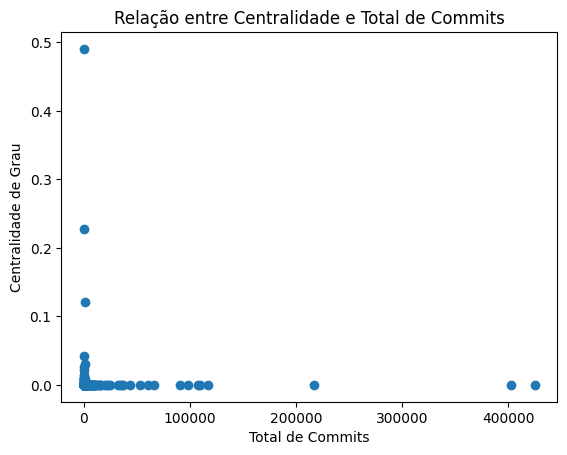

In [48]:
plt.scatter(list(total_commits.values()),list(centralities.values()))
plt.xlabel('Total de Commits' )
plt.ylabel('Centralidade de Grau')
plt.title('Relação entre Centralidade e Total de Commits')
plt.show()

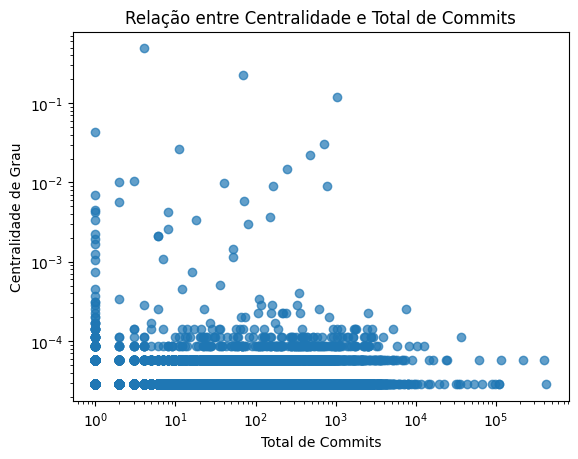

In [58]:
# Identificar usuários mais centrais
top_users = sorted(centralities, key=centralities.get, reverse=True)[:5]

# Definir limites para os eixos x e y
x_limit = (1, 4000)  # Substitua pelos limites desejados
y_limit = (1, 4000)  # Substitua pelos limites desejados

# Filtrar pontos dentro dos limites
filtered_users = {user_id: centrality for user_id, centrality in centralities.items() if x_limit[0] <= total_commits[user_id] <= x_limit[1] and y_limit[0] <= centrality <= y_limit[1]}

y_values = [value + 1 for value in list(total_commits.values())]

# Plotar o gráfico de dispersão com a escala logarítmica
plt.scatter(y_values, list(centralities.values()), alpha=0.7)

# Adicionar rótulos aos pontos dos usuários mais centrais
for user_id, centrality in filtered_users.items():
    if user_id in top_users:
        plt.text(y_values[user_id], centrality, str(user_id), fontsize=8, ha='center', va='bottom')

plt.xlabel('Total de Commits')
plt.ylabel('Centralidade de Grau')
plt.title('Relação entre Centralidade e Total de Commits')

# Ajustar a escala dos eixos para melhor visualização
plt.xscale('log')  # Usar escala logarítmica para centralidade
plt.yscale('log')  # Usar escala logarítmica para Total de Commits

plt.show()


In [61]:
# Adicionando as métricas do dataset ao grafo
for _, row in dataset_graph_stats.iterrows():
    node_id = row['Label']
    if graph_with_stats.has_node(node_id):
        graph_with_stats.nodes[node_id]['PublicRepos'] = row['PublicRepos']

graph_with_stats.nodes['nan']['PublicRepos'] = 0

# Visualizando a relação entre contribuições em repositórios abertos e centralidade
public_repos = nx.get_node_attributes(graph_with_stats, 'PublicRepos')

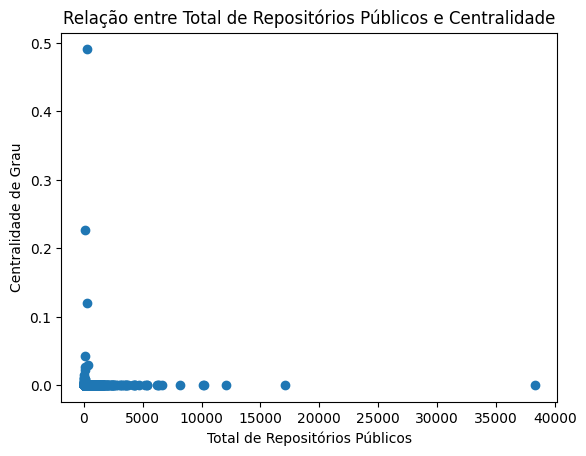

In [63]:
plt.scatter(list(public_repos.values()), list(centralities.values()))
plt.xlabel('Total de Repositórios Públicos')
plt.ylabel('Centralidade de Grau')
plt.title('Relação entre Total de Repositórios Públicos e Centralidade')
plt.show()


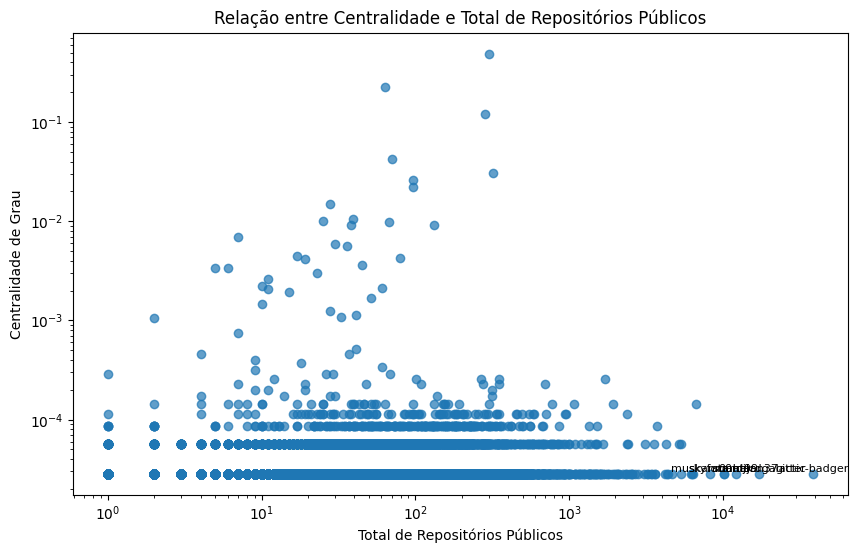

In [67]:
# Identificar nós com o maior número de repositórios públicos
top_repos_users = sorted(public_repos, key=public_repos.get, reverse=True)[:5]

# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(list(public_repos.values()), list(centralities.values()), alpha=0.7)

# Adicionar rótulos aos pontos
for user_id, repos in public_repos.items():
    if user_id in top_repos_users:
        plt.text(repos, centralities[user_id], str(user_id), fontsize=8, ha='center', va='bottom')

plt.xlabel('Total de Repositórios Públicos')
plt.ylabel('Centralidade de Grau')
plt.title('Relação entre Centralidade e Total de Repositórios Públicos')

# Ajustar a escala dos eixos para melhor visualização
plt.xscale('log')  # Usar escala logarítmica para Total de Repositórios Públicos
plt.yscale('log')  # Usar escala logarítmica para centralidade

plt.show()

--------------------------------------------------------

## Exportando o Grafo para o Gephi

In [ ]:
# Generate Graph.gml to Gephi Software

# nx.write_gml(G, "../resources/gephi/graph.gml")